## Import necessary libraries and the dataset

In [1]:
import numpy as np # linear alg.
import pandas as pd # for data processing. CSV file I/O
import matplotlib.pyplot as plt

house = pd.read_csv('./household_power_consumption/household_power_consumption.txt',
                    sep=';', parse_dates={'dt' : ['Date', 'Time']}, 
                    infer_datetime_format=True, low_memory=False, 
                    na_values=['nan','?'], index_col='dt')

house.shape

(2075259, 7)

(2075259, 7): This represents *rows-2075259* and *columns-7* that the dataset contains.

Null values:

In [2]:
house.isnull().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

Fill the null values with mean values:

In [5]:
house = house.fillna(house.mean())

In [6]:
house.tail(10)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2010-11-26 20:53:00,0.944,0.0,238.72,4.0,0.0,0.0,0.0
2010-11-26 20:54:00,0.946,0.0,239.31,4.0,0.0,0.0,0.0
2010-11-26 20:55:00,0.946,0.0,239.74,4.0,0.0,0.0,0.0
2010-11-26 20:56:00,0.942,0.0,239.41,4.0,0.0,0.0,0.0
2010-11-26 20:57:00,0.946,0.0,240.33,4.0,0.0,0.0,0.0
2010-11-26 20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2010-11-26 20:59:00,0.944,0.0,240.00,4.0,0.0,0.0,0.0
2010-11-26 21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2010-11-26 21:01:00,0.934,0.0,239.70,3.8,0.0,0.0,0.0


## Data Set Information:

This archive contains 2075259 measurements gathered in a house located in Sceaux (7km of Paris, France) between December 2006 and November 2010 (47 months).
Notes:
1. (global_active_power*1000/60 - sub_metering_1 - sub_metering_2 - sub_metering_3) represents the active energy consumed every minute (in watt hour) in the household by electrical equipment not measured in sub-meterings 1, 2 and 3.
2. The dataset contains some missing values in the measurements (nearly 1,25% of the rows). All calendar timestamps are present in the dataset but for some timestamps, the measurement values are missing: a missing value is represented by the absence of value between two consecutive semi-colon attribute separators. For instance, the dataset shows missing values on April 28, 2007.


## Attribute Information:

1. date: Date in format dd/mm/yyyy (dt)
2. time: time in format hh:mm:ss    (dt)
3. global_active_power: household global minute-averaged active power (in kilowatt)
4. global_reactive_power: household global minute-averaged reactive power (in kilowatt)
5. voltage: minute-averaged voltage (in volt)
6. global_intensity: household global minute-averaged current intensity (in ampere)
7. sub_metering_1: energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered).
8. sub_metering_2: energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.
9. sub_metering_3: energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.



In [7]:
house.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

There are no null values left after filling with mean values.

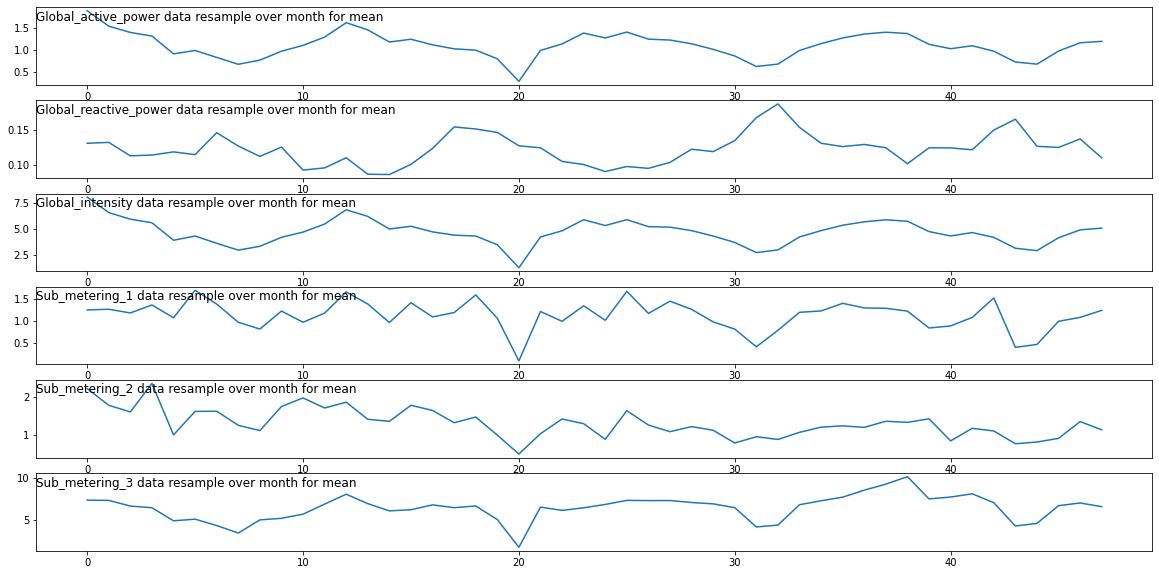

In [10]:
import matplotlib.pyplot as plt

i = 1
cols=[0, 1, 3, 4, 5, 6]
plt.figure(figsize=(20, 10))
for col in cols:
    plt.subplot(len(cols), 1, i)
    plt.plot(house.resample('M').mean().values[:, col])
    plt.title(house.columns[col] + ' data resample over month for mean', y=0.75, loc='left')
    i += 1
plt.show()